## Automating Pulling specific data from Coinmarketcap's API

In [30]:
import pandas as pd 
import json
from requests import Request, Session
from requests.exceptions import Timeout,ConnectionError,TooManyRedirects
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


Creating a function called crypto_api_automation and loop_crypto that will request info from Coinmarketcap's API based on the Users input and store it as a Dataframe:

User Questions: 
* How many times would you want the data pulled? --> Determines how many times the function will loop.
* Time interval bewteen each Pull cycle? --> Determines how long the script should wait between each cycle in minutes.
* Is all the information inputted correct?  --> Takes only a yes or no argument. If yes the script will continue, if no the script will stop.

In [2]:
crypto_data = pd.DataFrame([])

In [3]:
def crypto_api_automation():
    global crypto_data
   
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"

    parameters = {
    "start":"1",
    "limit":"2000",
    "convert":"USD"
    }

    headers = {
    "Accepts" : "application/json",
    "X-CMC_PRO_API_KEY": "900fc405-e562-40d9-a7c7-6c51f3cd52f4",
    }

    session = Session()
    session.headers.update(headers)

    try:
     response = session.get(url,params=parameters)
     data = json.loads(response.text)
    except(ConnectionError,Timeout,TooManyRedirects) as error:
        print(error)
        
    crypto_data_pull = pd.json_normalize(data["data"])
    crypto_data_pull["time_stamp"] = pd.to_datetime("now")
    crypto_data = crypto_data.append(crypto_data_pull)
    
    
    

In [4]:
def loop_crypto():
    from time import time 
    from time import sleep
    
    print("How Many times would you want the data pulled?: ")
    sleep(1)
    Cycles = int(input("Cycles?:"))
    sleep(1)
    print("Time Interval bewtween each pull in minutes?: ")
    sleep(1)
    time_interval = float(input("Minutes?:"))

    print(f"{Cycles} Cycles and {time_interval} minutes, is this correct?:")
    input_boolean = str.upper(input("Yes or No:"))

    if input_boolean == "YES":
        for i in range(Cycles):
            crypto_api_automation()
            print(f"Cycle {i+1} completed")
            if i == Cycles - 1:
                break
            sleep(time_interval * 60)
            
        print("All Cycles Completed!")
    else:
        print("Retry")

    


In [5]:
loop_crypto()

How Many times would you want the data pulled?: 
Time Interval bewtween each pull in minutes?: 
1 Cycles and 0.0 minutes, is this correct?:
Cycle 1 completed
All Cycles Completed!


In [6]:
len(crypto_data)

2000

In [7]:
pd.set_option("display.max_columns",None) # Will show all the columns in the Dataframe now
crypto_data.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,9547,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.907281e+07,1.907281e+07,NaN,1,NaN,NaN,NaN,2022-06-21T02:27:00.000Z,20499.748820,2.976565e+10,-16.9125,-0.825276,2.924057,-3.528855,-30.372479,-49.463919,-51.726003,3.909879e+11,43.3006,4.304947e+11,NaN,2022-06-21T02:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-21 02:28:18.717366
1,1027,Ethereum,ETH,ethereum,5762,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.212487e+08,1.212487e+08,NaN,2,NaN,NaN,NaN,2022-06-21T02:26:00.000Z,1119.904925,1.924290e+10,-10.1488,-1.041903,3.800676,0.325191,-43.284700,-62.690015,-62.382055,1.357871e+11,15.0513,1.357871e+11,NaN,2022-06-21T02:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-21 02:28:18.717366
2,825,Tether,USDT,tether,34897,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.749508e+10,6.861062e+10,NaN,3,NaN,NaN,NaN,2022-06-21T02:26:00.000Z,0.999019,5.112898e+10,-8.8339,0.008462,0.017324,0.031654,0.033193,-0.115649,-0.152317,6.742885e+10,7.4675,6.854329e+10,NaN,2022-06-21T02:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-21 02:28:18.717366
3,3408,USD Coin,USDC,usd-coin,4553,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.573051e+10,5.573051e+10,NaN,4,NaN,NaN,NaN,2022-06-21T02:26:00.000Z,1.000391,5.234549e+09,-11.9853,0.024533,0.006611,0.024028,0.033365,0.006023,0.026347,5.575228e+10,6.1799,5.575228e+10,NaN,2022-06-21T02:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-21 02:28:18.717366
4,1839,BNB,BNB,bnb,966,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-06-21T02:26:00.000Z,216.248728,1.223286e+09,-7.5200,-0.712590,3.921528,3.943120,-31.102484,-47.209262,-46.660980,3.530844e+10,3.9138,3.570629e+10,NaN,2022-06-21T02:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-21 02:28:18.717366


***
## Visualizing specific columns:

In [8]:
crypto_data_2 = crypto_data[
["name","cmc_rank","quote.USD.percent_change_1h","quote.USD.percent_change_24h","quote.USD.percent_change_7d",
"quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]
].copy()

crypto_data_2.head()

,name,cmc_rank,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
0,Bitcoin,1,-0.825276,2.924057,-3.528855,-30.372479,-49.463919,-51.726003
1,Ethereum,2,-1.041903,3.800676,0.325191,-43.284700,-62.690015,-62.382055
2,Tether,3,0.008462,0.017324,0.031654,0.033193,-0.115649,-0.152317
3,USD Coin,4,0.024533,0.006611,0.024028,0.033365,0.006023,0.026347
4,BNB,5,-0.712590,3.921528,3.943120,-31.102484,-47.209262,-46.660980


In [9]:
crypto_data_2.rename(columns={
    "cmc_rank":"rank","quote.USD.percent_change_1h":"1hr","quote.USD.percent_change_24h":"24hr",
    "quote.USD.percent_change_7d":"7d","quote.USD.percent_change_30d":"30d",
    "quote.USD.percent_change_60d":"60d","quote.USD.percent_change_90d":"90d"
},inplace=True)

In [10]:
crypto_data_2 = crypto_data_2[crypto_data_2["rank"] <= 10]
crypto_data_2.head(20)

,name,rank,1hr,24hr,7d,30d,60d,90d
0,Bitcoin,1,-0.825276,2.924057,-3.528855,-30.372479,-49.463919,-51.726003
1,Ethereum,2,-1.041903,3.800676,0.325191,-43.284700,-62.690015,-62.382055
2,Tether,3,0.008462,0.017324,0.031654,0.033193,-0.115649,-0.152317
3,USD Coin,4,0.024533,0.006611,0.024028,0.033365,0.006023,0.026347
4,BNB,5,-0.712590,3.921528,3.943120,-31.102484,-47.209262,-46.660980
5,Binance USD,6,0.168755,0.126120,0.034619,0.203125,0.111381,0.045796
6,Cardano,7,-1.683147,3.818255,9.306472,-7.686618,-47.052044,-50.522403
7,XRP,8,-1.036296,0.784155,8.050158,-22.132542,-56.203913,-61.520209
8,Solana,9,-1.312792,7.267613,32.123685,-30.392854,-65.895082,-61.518205
9,Dogecoin,10,-1.074592,1.742199,15.735546,-29.630895,-56.561949,-51.593678


In [11]:
crypto_data_3 = crypto_data_2.melt(id_vars=["name","rank"],var_name="Time",value_name="Percent change")
crypto_data_3.head(10)

,name,rank,Time,Percent change
0,Bitcoin,1,1hr,-0.825276
1,Ethereum,2,1hr,-1.041903
2,Tether,3,1hr,0.008462
3,USD Coin,4,1hr,0.024533
4,BNB,5,1hr,-0.712590
5,Binance USD,6,1hr,0.168755
6,Cardano,7,1hr,-1.683147
7,XRP,8,1hr,-1.036296
8,Solana,9,1hr,-1.312792
9,Dogecoin,10,1hr,-1.074592


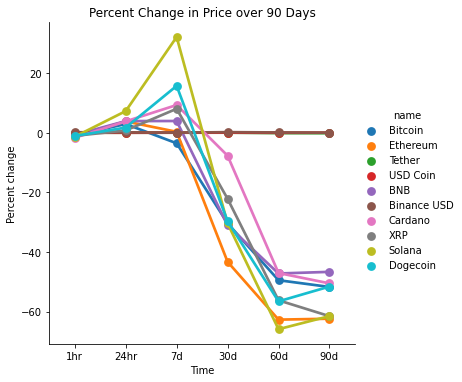

In [12]:
sns.catplot(x="Time", y="Percent change",hue="name",data=crypto_data_3,kind="point").set(title="Percent Change in Price over 90 Days")

***

In [13]:
crypto_data_4 = crypto_data[["name","circulating_supply","quote.USD.price"]].copy()
crypto_data_4.head(10)

,name,circulating_supply,quote.USD.price
0,Bitcoin,1.907281e+07,20499.748820
1,Ethereum,1.212487e+08,1119.904925
2,Tether,6.749508e+10,0.999019
3,USD Coin,5.573051e+10,1.000391
4,BNB,1.632770e+08,216.248728
5,Binance USD,1.718701e+10,1.001424
6,Cardano,3.373903e+10,0.486358
7,XRP,4.834310e+10,0.321811
8,Solana,3.425093e+08,34.952730
9,Dogecoin,1.326708e+11,0.059459


In [14]:
pd.set_option("display.float_format", lambda x: "%.2f"% x)

In [15]:
crypto_data_4.rename(columns={"quote.USD.price":"Price(USD)"},inplace=True)
crypto_data_4.head()

,name,circulating_supply,Price(USD)
0,Bitcoin,19072812.00,20499.75
1,Ethereum,121248746.69,1119.90
2,Tether,67495084613.29,1.00
3,USD Coin,55730507797.89,1.00
4,BNB,163276974.63,216.25


In [16]:
crypto_data_4 =crypto_data_4[(crypto_data_4["name"] != "Tether")&(crypto_data_4["name"] != "Binance USD")&(crypto_data_4["name"] != "USD Coin")&(crypto_data_4["name"] != "Shiba Inu")].head(15)
crypto_data_4

,name,circulating_supply,Price(USD)
0,Bitcoin,19072812.00,20499.75
1,Ethereum,121248746.69,1119.90
4,BNB,163276974.63,216.25
6,Cardano,33739028515.76,0.49
7,XRP,48343101197.00,0.32
8,Solana,342509315.79,34.95
9,Dogecoin,132670764299.89,0.06
10,Polkadot,987579314.96,7.75
11,Dai,6743872611.11,1.00
12,TRON,92512660931.35,0.06


In [17]:
crypto_data_4["circulating_supply"].describe()

count             15.00
mean     21138960057.24
std      40514806498.79
min           266879.72
25%        128361048.45
50%        342509315.79
75%      20241450563.43
max     132670764299.89
Name: circulating_supply, dtype: float64

<ipython-input-18-d4ef0478936f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(crypto_data_4["name"],rotation="vertical",size=8)


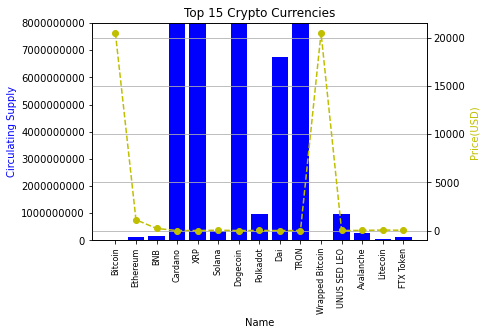

In [18]:
fig, ax1 = plt.subplots() # Use to have two x values or two y values in a graph at the same time

ax2 = ax1.twinx()
ax1.bar(crypto_data_4["name"],crypto_data_4["circulating_supply"],color="b") # creates a bar graph(x values, y values, color of bars)
ax2.plot(crypto_data_4["name"],crypto_data_4["Price(USD)"],"--yo",linewidth=1.5) 

ax1.margins(0.05)
ax1.set_xlabel("Name")
ax1.set_ylabel("Circulating Supply",color="b")
ax1.set_xticklabels(crypto_data_4["name"],rotation="vertical",size=8)
ax1.ticklabel_format(axis="y",style="plain")
ax1.set_ylim(bottom=0,top=8000000000)
ax2.set_ylabel("Price(USD)",color="y")
plt.title("Top 15 Crypto Currencies")
plt.grid()
plt.show()

***

## Cleaning original data and storing it as a CSV 

In [19]:
crypto_data_final = crypto_data.copy()

In [20]:
crypto_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  2000 non-null   int64         
 1   name                                2000 non-null   object        
 2   symbol                              2000 non-null   object        
 3   slug                                2000 non-null   object        
 4   num_market_pairs                    2000 non-null   int64         
 5   date_added                          2000 non-null   object        
 6   tags                                2000 non-null   object        
 7   max_supply                          1269 non-null   float64       
 8   circulating_supply                  2000 non-null   float64       
 9   total_supply                        2000 non-null   float64       
 10  platform                

Removing columns that contain NAN values that cannot be replaced. 

Currently there are 9 columns that contain NAN values. 

Removing 8 out of the 9 columns, the column "max_supply" will have its NAN values replaced by 0.
 
The 0 will show that the crypto currency does not have a set limit of coins that are able to be minted.


In [21]:
crypto_data_final["max_supply"].fillna(0,inplace=True)

Removing  the 8 other columns:

In [22]:
crypto_data_final.dropna(axis="columns",how="any",inplace=True)

Removing columns that have no meaningful data:

In [23]:
crypto_data_final.drop(columns=["slug","total_supply","last_updated","quote.USD.last_updated"],inplace=True)
crypto_data_final.head()

,id,name,symbol,num_market_pairs,date_added,tags,max_supply,circulating_supply,cmc_rank,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,time_stamp
0,1,Bitcoin,BTC,9547,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19072812.00,1,20499.75,29765652455.12,-16.91,-0.83,2.92,-3.53,-30.37,-49.46,-51.73,390987855287.37,43.30,430494725215.91,2022-06-21 02:28:18.717366
1,1027,Ethereum,ETH,5762,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",0.00,121248746.69,2,1119.90,19242897400.29,-10.15,-1.04,3.80,0.33,-43.28,-62.69,-62.38,135787068616.35,15.05,135787068616.35,2022-06-21 02:28:18.717366
2,825,Tether,USDT,34897,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",0.00,67495084613.29,3,1.00,51128977035.69,-8.83,0.01,0.02,0.03,0.03,-0.12,-0.15,67428850151.20,7.47,68543293493.07,2022-06-21 02:28:18.717366
3,3408,USD Coin,USDC,4553,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",0.00,55730507797.89,4,1.00,5234548984.29,-11.99,0.02,0.01,0.02,0.03,0.01,0.03,55752280833.37,6.18,55752280833.37,2022-06-21 02:28:18.717366
4,1839,BNB,BNB,966,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00,163276974.63,5,216.25,1223285800.78,-7.52,-0.71,3.92,3.94,-31.10,-47.21,-46.66,35308438153.12,3.91,35706289400.05,2022-06-21 02:28:18.717366


Converting date_added into datetime object

In [24]:
crypto_data_final["date_added"] = pd.to_datetime(crypto_data_final["date_added"])

In [25]:
crypto_data_final["date_added"] = crypto_data_final["date_added"].dt.date
crypto_data_final["date_added"] = pd.to_datetime(crypto_data_final["date_added"])

In [26]:
print(crypto_data_final["date_added"].dtype)

datetime64[ns]


In [27]:
crypto_data_final.rename(columns={"date_added":"date_added(y-m-d)"},inplace=True)
crypto_data_final.head()

,id,name,symbol,num_market_pairs,date_added(y-m-d),tags,max_supply,circulating_supply,cmc_rank,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,time_stamp
0,1,Bitcoin,BTC,9547,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19072812.00,1,20499.75,29765652455.12,-16.91,-0.83,2.92,-3.53,-30.37,-49.46,-51.73,390987855287.37,43.30,430494725215.91,2022-06-21 02:28:18.717366
1,1027,Ethereum,ETH,5762,2015-08-07,"[mineable, pow, smart-contracts, ethereum-ecos...",0.00,121248746.69,2,1119.90,19242897400.29,-10.15,-1.04,3.80,0.33,-43.28,-62.69,-62.38,135787068616.35,15.05,135787068616.35,2022-06-21 02:28:18.717366
2,825,Tether,USDT,34897,2015-02-25,"[payments, stablecoin, asset-backed-stablecoin...",0.00,67495084613.29,3,1.00,51128977035.69,-8.83,0.01,0.02,0.03,0.03,-0.12,-0.15,67428850151.20,7.47,68543293493.07,2022-06-21 02:28:18.717366
3,3408,USD Coin,USDC,4553,2018-10-08,"[medium-of-exchange, stablecoin, asset-backed-...",0.00,55730507797.89,4,1.00,5234548984.29,-11.99,0.02,0.01,0.02,0.03,0.01,0.03,55752280833.37,6.18,55752280833.37,2022-06-21 02:28:18.717366
4,1839,BNB,BNB,966,2017-07-25,"[marketplace, centralized-exchange, payments, ...",165116760.00,163276974.63,5,216.25,1223285800.78,-7.52,-0.71,3.92,3.94,-31.10,-47.21,-46.66,35308438153.12,3.91,35706289400.05,2022-06-21 02:28:18.717366


Exporting Dataframe into a csv file:

In [28]:
crypto_data_final.to_csv(r"C:\Users\alexc\OneDrive\Documents\cleaned_crypto_data.csv",header="column_names")

***
# Creating a Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

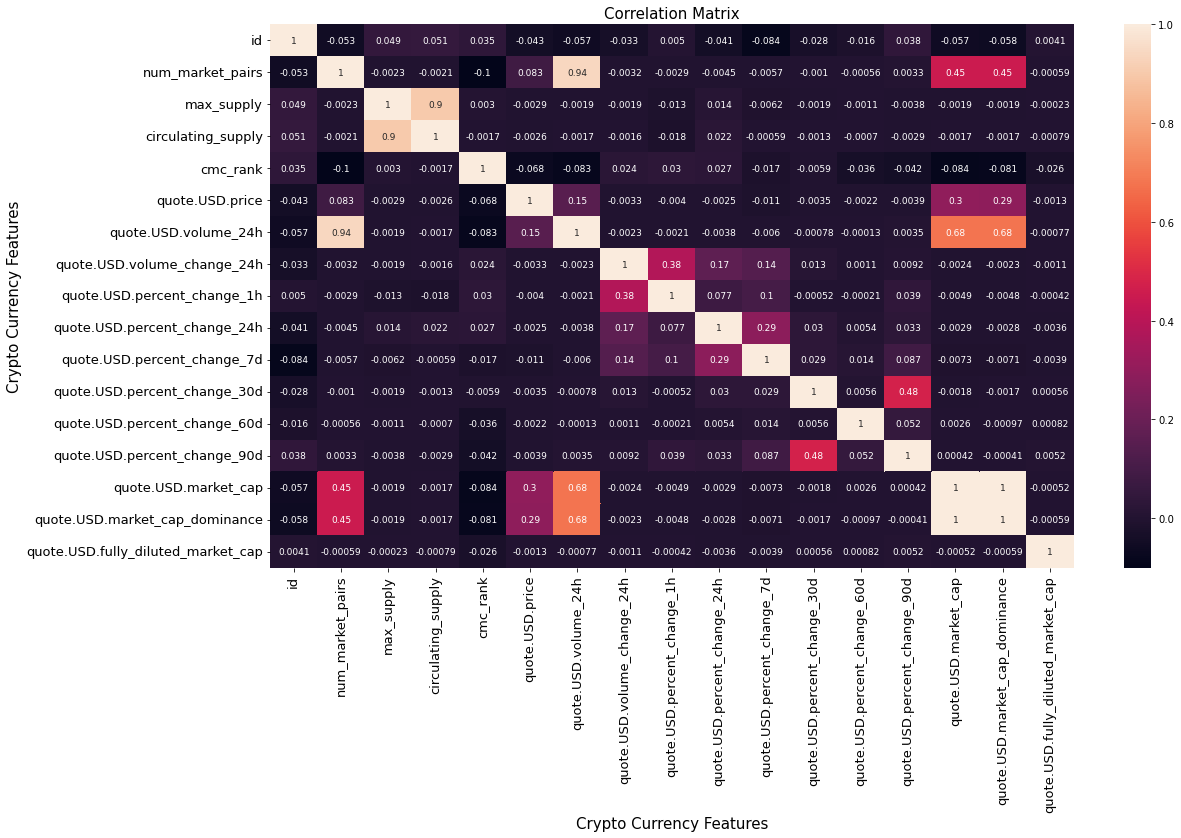

In [58]:
correlation_matrix = crypto_data_final.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix,annot=True,annot_kws={"size":9})
plt.yticks(va="center",fontsize=13)
plt.xticks(ha="center",fontsize=13)
plt.title("Correlation Matrix",fontsize=15)
plt.ylabel("Crypto Currency Features",fontsize=15)
plt.xlabel("Crypto Currency Features",fontsize=15)
plt.show

Conclusion: none of the features have any significant correlation with one another.

Thought there would be a high correlation between circulating supply and price, however the results showed that there is no correlation between the two. 

Correlation: -0.0026